<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

*Algirdas Laukaitis*

<br><br>

---



# PART 1

<font color='SeaGreen'>Download and prepare the CIFAR10 dataset</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/PICOL_Download.svg/1024px-PICOL_Download.svg.png" width=100 height=100>


In [1]:
#@title The code that loads the CIFAR-10 dataset, a database featuring images of various objects from our world.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
#@title Normalizing the pixel values is crucial, ensuring our data is ready for the challenges ahead

train_images, test_images = train_images / 255.0, test_images / 255.0

<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


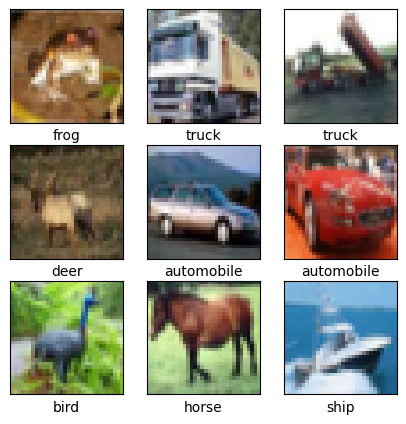

In [3]:
#@title  Let's navigate through a hundred images from CIFAR-10 to ensure our data is intact. It's essential to know what we're up against.
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


<br><br><br><br>


# <font color='SeaGreen'>Convolutional Autoencoder</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width=400 height=250>

<br><br>

---
###<font color='SeaGreen'>Step 2. Model </font>

In [4]:
from tensorflow.keras.models import Model

In [9]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

x = layers.Conv2D(3, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(1, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 3)             │             867 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 3)             │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 8, 8, 1)             │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 1)             │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,002 (85.95 KB)

 Trainable params: 21,738 (84.91 KB)

 Non-trainable params: 264 (1.03 KB)

<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [10]:


history = autoencoder.fit( x=train_images, y=train_images, epochs=20, batch_size=128,  shuffle=True,  validation_data=(test_images, test_images),)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 0.0374 - val_loss: 0.0345
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0180 - val_loss: 0.0195
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0163 - val_loss: 0.0178
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0158 - val_loss: 0.0167
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0154 - val_loss: 0.0155
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0151 - val_loss: 0.0153
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0150 - val_loss: 0.0151
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━

In [12]:
decoded_train_imgs = autoencoder.predict(train_images)
decoded_test_imgs = autoencoder.predict(test_images)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


####<font color='SeaGreen'>Evaluate the model</font>

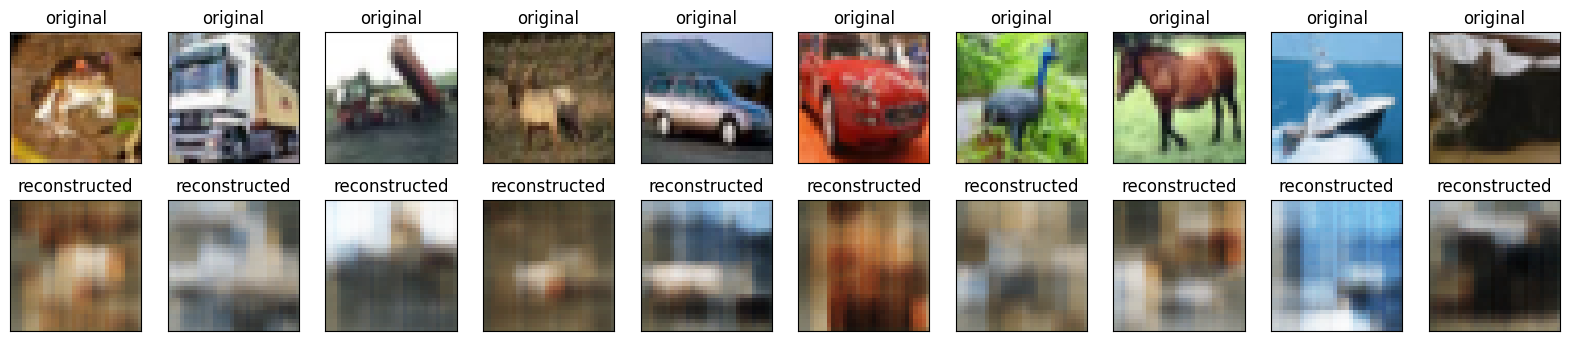

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(train_images[i]) # test_images[i]  train_images[i]
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_train_imgs[i]) # decoded_train_imgs  decoded_test_imgs[i]
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()